In [1]:
import pandas as pd
data=pd.read_csv('/content/Wine_clust.csv')

In [2]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [4]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [5]:
data.isna().sum()

,0
Alcohol,0
Malic_Acid,0
Ash,0
Ash_Alcanity,0
Magnesium,0
Total_Phenols,0
Flavanoids,0
Nonflavanoid_Phenols,0
Proanthocyanins,0
Color_Intensity,0


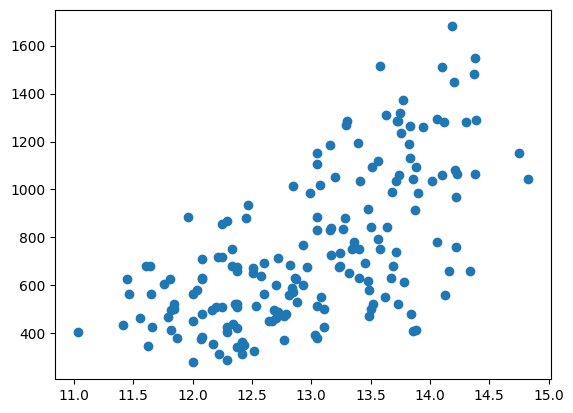

In [6]:
import matplotlib.pyplot as plt
plt.scatter(data['Alcohol'],data['Proline'])

**K-MEANS**

In [7]:
from sklearn.cluster import KMeans

wcss=[]
ks=range(1,15)

for k in ks:
  model=KMeans(n_clusters=k)
  model.fit(data)
  wcss.append(model.inertia_)

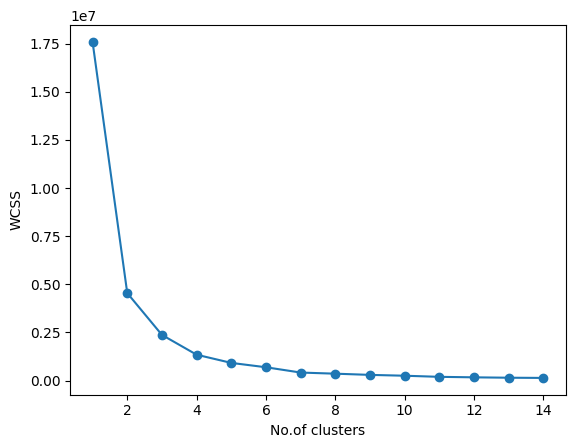

In [8]:
plt.plot(ks,wcss,'-o')
plt.xlabel("No.of clusters")
plt.ylabel("WCSS")
plt.show()

In [9]:
model_kmeans=KMeans(n_clusters=3)
model_kmeans.fit(data)

KMeans(n_clusters=3)

In [10]:
labels= model_kmeans.predict(data)

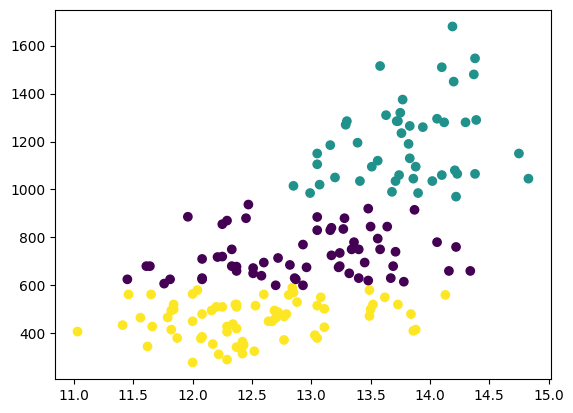

In [11]:
plt.scatter(data['Alcohol'],data['Proline'],c=labels)

**AGGLOMERATIVE**

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

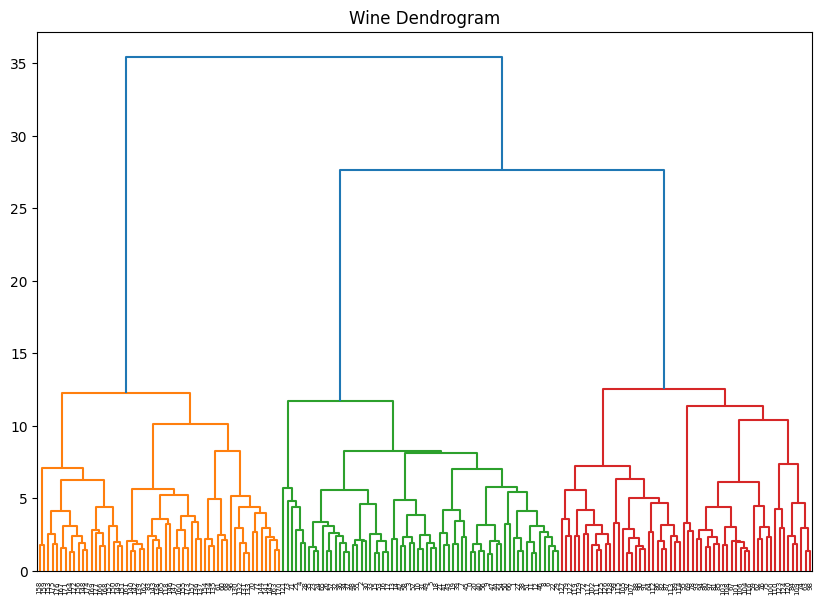

In [13]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title('Wine Dendrogram')
dend=shc.dendrogram(shc.linkage(X_scaled,method='ward'))

In [14]:
from sklearn.cluster import AgglomerativeClustering

cluster= AgglomerativeClustering(n_clusters=3,metric='euclidean',linkage='ward')

labels= cluster.fit_predict(X_scaled)

In [15]:
X_scaled_df=pd.DataFrame(X_scaled,columns=data.columns)

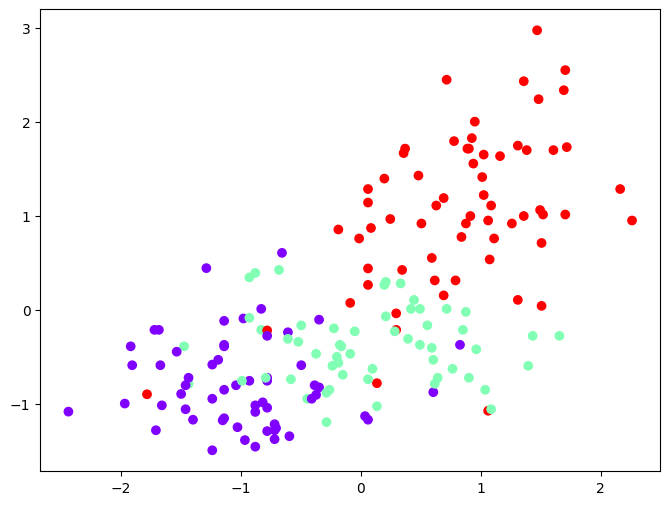

In [16]:
plt.figure(figsize=(8,6))
plt.scatter(X_scaled_df['Alcohol'],X_scaled_df['Proline'],c=cluster.labels_,cmap='rainbow')

In [17]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2) # into how many columns we want
pca.fit(X_scaled)
x_pca=pca.transform(X_scaled)

In [18]:
x_pca

array([[ 3.31675081,  1.44346263],
       [ 2.20946492, -0.33339289],
       [ 2.51674015,  1.0311513 ],
       [ 3.75706561,  2.75637191],
       [ 1.00890849,  0.86983082],
       [ 3.05025392,  2.12240111],
       [ 2.44908967,  1.17485013],
       [ 2.05943687,  1.60896307],
       [ 2.5108743 ,  0.91807096],
       [ 2.75362819,  0.78943767],
       [ 3.47973668,  1.30233324],
       [ 1.7547529 ,  0.61197723],
       [ 2.11346234,  0.67570634],
       [ 3.45815682,  1.13062988],
       [ 4.31278391,  2.09597558],
       [ 2.3051882 ,  1.66255173],
       [ 2.17195527,  2.32730534],
       [ 1.89897118,  1.63136888],
       [ 3.54198508,  2.51834367],
       [ 2.0845222 ,  1.06113799],
       [ 3.12440254,  0.78689711],
       [ 1.08657007,  0.24174355],
       [ 2.53522408, -0.09184062],
       [ 1.64498834, -0.51627893],
       [ 1.76157587, -0.31714893],
       [ 0.9900791 ,  0.94066734],
       [ 1.77527763,  0.68617513],
       [ 1.23542396, -0.08980704],
       [ 2.18840633,

Text(0, 0.5, 'Second Principal Component')

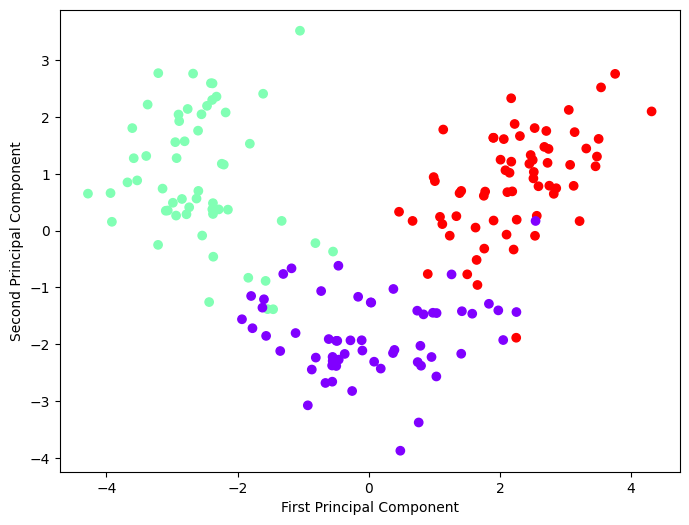

In [19]:
plt.figure(figsize =(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c =cluster.labels_,cmap ='rainbow')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

**DBSCAN**

In [20]:
from sklearn.cluster import DBSCAN

dbscan=DBSCAN(eps=0.6,min_samples=5)
clusters= dbscan.fit_predict(x_pca)

Text(0, 0.5, 'Second Principal Component')

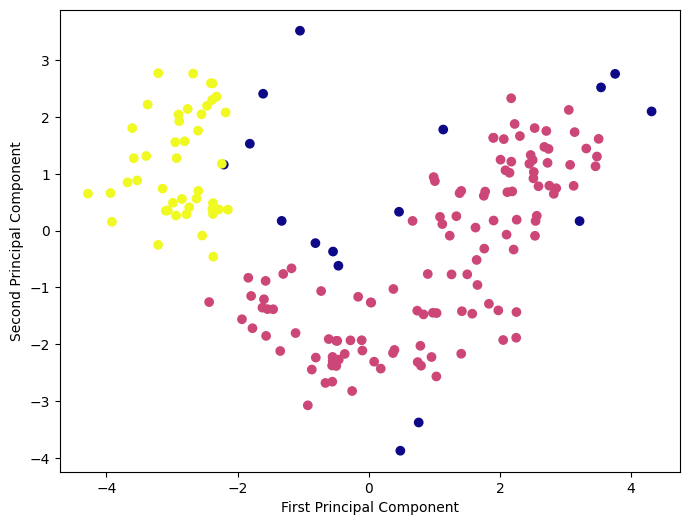

In [21]:
plt.figure(figsize =(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c =clusters, cmap ='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')